In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [16]:
# Load the dataset
df = pd.read_csv('old/output.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.274594,0.341100,0.296270,0.312207,0.498838,0.277839,0.502045,0.276516,0.647718,0.377252,0.644682,0.365430,0.796186,0.444226,0.789818,0.420560,0
1,0.274228,0.339355,0.296200,0.314031,0.499674,0.290913,0.502771,0.283680,0.651548,0.386282,0.649158,0.370324,0.800622,0.451912,0.794588,0.421224,0
2,0.274257,0.340742,0.295690,0.314558,0.501407,0.301187,0.503510,0.287559,0.652140,0.388949,0.650082,0.371274,0.800812,0.452804,0.794849,0.419406,0
3,0.274333,0.339990,0.295731,0.312993,0.502167,0.307759,0.504253,0.291864,0.653057,0.392245,0.652118,0.371948,0.802255,0.449354,0.798330,0.416195,0
4,0.274171,0.343735,0.295011,0.311912,0.502102,0.310477,0.504130,0.292234,0.652161,0.394069,0.651391,0.372265,0.802788,0.448811,0.798766,0.415271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29225,0.686127,0.417011,0.712502,0.438017,0.489872,0.235213,0.489170,0.248146,0.352258,0.368526,0.350424,0.391012,0.222121,0.484695,0.211550,0.498153,2
29226,0.693965,0.417500,0.718311,0.436175,0.496492,0.242646,0.495907,0.255783,0.359015,0.371514,0.352901,0.394469,0.224898,0.485443,0.211625,0.499482,2
29227,0.695831,0.417349,0.720067,0.432963,0.498751,0.250418,0.498827,0.266152,0.361978,0.379162,0.357031,0.397612,0.225877,0.485704,0.212916,0.499286,2
29228,0.704168,0.404210,0.730823,0.426571,0.505799,0.260387,0.505240,0.280236,0.369494,0.387963,0.366603,0.407364,0.232543,0.491641,0.218939,0.505378,2


<Axes: xlabel='label'>

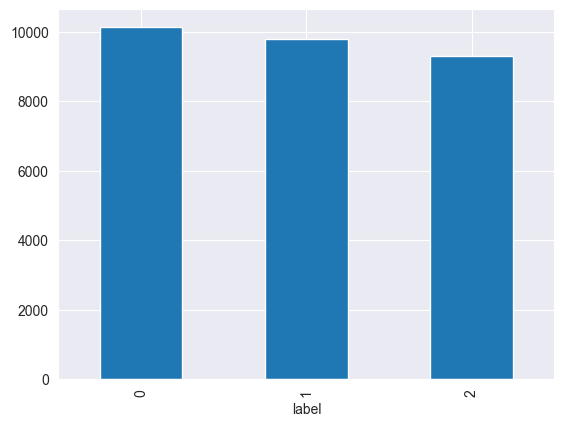

In [17]:
# plot the label distribution between 0, 1 and 2 value counts
df["label"].value_counts().plot(kind='bar')


In [18]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [19]:
# check for missing values
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

In [20]:
# drop the missing values
df = df.dropna()
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

# Preprocessing

In [21]:
# Split the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the NumPy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Create a DataLoader
trainloader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
testloader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, 64)  # Change input size to 16
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
# Initialize the model
model = Net()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [24]:
# Train the model
n_epochs = 100
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    model.train()
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_losses[it] = loss.item()

    model.eval()
    for inputs, targets in testloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_losses[it] = loss.item()

    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_losses[it]:.4f}, Test Loss: {test_losses[it]:.4f}')
    

Epoch 1/100, Train Loss: 0.0001, Test Loss: 0.0491
Epoch 2/100, Train Loss: 0.0004, Test Loss: 0.0251
Epoch 3/100, Train Loss: 0.0029, Test Loss: 0.1116
Epoch 4/100, Train Loss: 0.0423, Test Loss: 0.0061
Epoch 5/100, Train Loss: 0.0008, Test Loss: 0.0134
Epoch 6/100, Train Loss: 0.0606, Test Loss: 0.0057
Epoch 7/100, Train Loss: 0.0016, Test Loss: 0.0197
Epoch 8/100, Train Loss: 0.0131, Test Loss: 0.1164
Epoch 9/100, Train Loss: 0.0026, Test Loss: 0.0010
Epoch 10/100, Train Loss: 0.0002, Test Loss: 0.0774
Epoch 11/100, Train Loss: 0.0003, Test Loss: 0.0029
Epoch 12/100, Train Loss: 0.0016, Test Loss: 0.0094
Epoch 13/100, Train Loss: 0.0015, Test Loss: 0.0033
Epoch 14/100, Train Loss: 0.0381, Test Loss: 0.0106
Epoch 15/100, Train Loss: 0.0005, Test Loss: 0.0170
Epoch 16/100, Train Loss: 0.0019, Test Loss: 0.0145
Epoch 17/100, Train Loss: 0.0009, Test Loss: 0.0108
Epoch 18/100, Train Loss: 0.0095, Test Loss: 0.0034
Epoch 19/100, Train Loss: 0.0032, Test Loss: 0.0027
Epoch 20/100, Train L

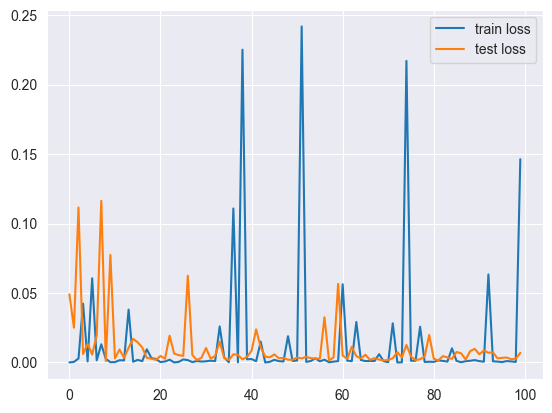

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


In [28]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc
    

0.9947399931577147

Confusion matrix, without normalization
[[2001   23    0]
 [  11 1946    0]
 [   1    0 1864]]


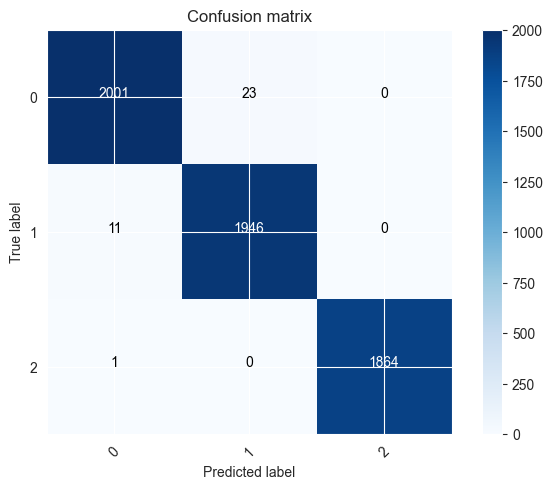

In [47]:
# confusion matrix plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Get all predictions in an array and plot the confusion matrix
model.eval()
predictions = []
targets = []
for inputs, targets_batch in testloader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    predictions.extend(preds)
    targets.extend(targets_batch)

predictions = torch.stack(predictions).cpu()
targets = torch.stack(targets).cpu()
cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, list(range(3)))

In [52]:
import torch.onnx

# Create a dummy input tensor with the correct shape
dummy_input = torch.randn(1, 16)  # Adjust the shape if needed

# Export the model to ONNX format
torch.onnx.export(model, dummy_input, "/Users/defeee/Downloads/model.onnx", verbose=False)